## ch-KERnel K-Means

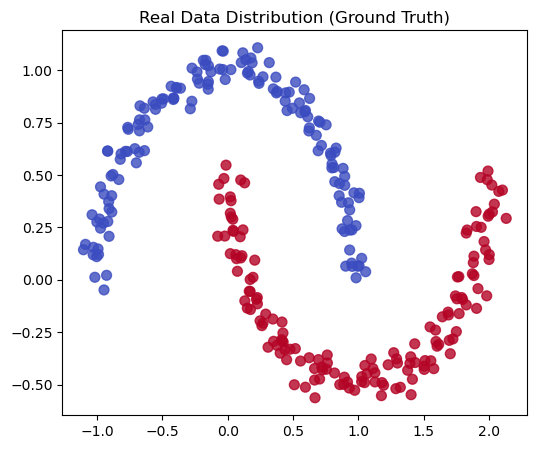

Confusion Matrix:
[[ 37 113]
 [112  38]]
True Positives (TP): 38
True Negatives (TN): 37
False Positives (FP): 113
False Negatives (FN): 112


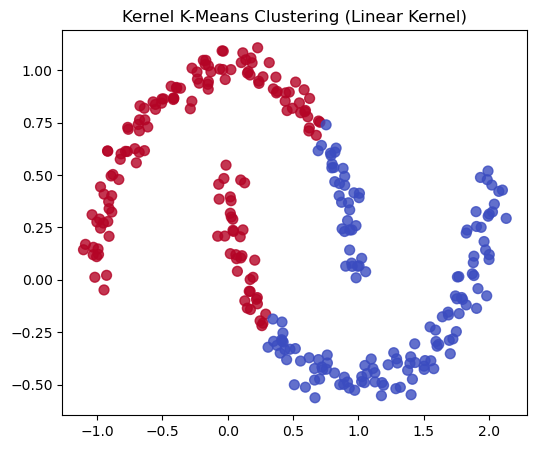

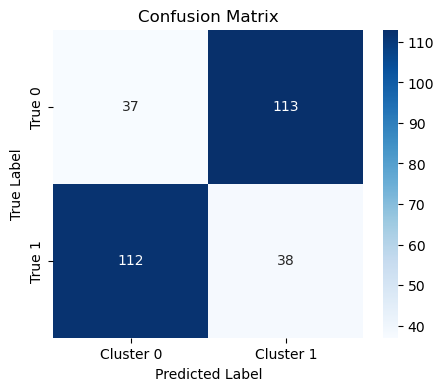

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_kernels, confusion_matrix, accuracy_score
from sklearn.datasets import make_moons

class KernelKMeans:
    def __init__(self, n_clusters=2, kernel="rbf", max_iter=100, tol=1e-4, gamma=1.0, degree=3, coef0=1):
        self.n_clusters = n_clusters
        self.kernel = kernel
        self.max_iter = max_iter
        self.tol = tol
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0

    def _get_kernel_params(self):
        """ Returns only the valid parameters for the chosen kernel """
        params = {}
        if self.kernel in ["rbf", "laplacian"]:
            params["gamma"] = self.gamma
        elif self.kernel in ["poly"]:
            params["gamma"] = self.gamma
            params["degree"] = self.degree
            params["coef0"] = self.coef0
        elif self.kernel in ["sigmoid"]:
            params["gamma"] = self.gamma
            params["coef0"] = self.coef0
        return params

    def fit(self, X):
        """ Fit the Kernel K-Means model """
        n_samples = X.shape[0]
        self.labels_ = np.random.randint(self.n_clusters, size=n_samples)

        # Compute the kernel matrix
        K = pairwise_kernels(X, metric=self.kernel, **self._get_kernel_params())

        for _ in range(self.max_iter):
            # Compute cluster assignment
            dist_matrix = np.zeros((n_samples, self.n_clusters))

            for k in range(self.n_clusters):
                cluster_mask = (self.labels_ == k)
                if np.sum(cluster_mask) == 0:
                    continue
                K_cluster = K[:, cluster_mask]
                dist_matrix[:, k] = np.diag(K) - 2 * np.sum(K_cluster, axis=1) / np.sum(cluster_mask) + \
                                    np.sum(K_cluster) / (np.sum(cluster_mask) ** 2)

            new_labels = np.argmin(dist_matrix, axis=1)

            # Check for convergence
            if np.linalg.norm(new_labels - self.labels_) < self.tol:
                break
            self.labels_ = new_labels

    def predict(self, X):
        """ Predict cluster assignments for new data """
        return self.labels_

# ---- Generate Synthetic Data ----
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# ---- Plot Real Data ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Real Data Distribution (Ground Truth)")
plt.show()

# ---- Run Kernel K-Means ----
kernel_kmeans = KernelKMeans(n_clusters=2, kernel="linear", gamma=0.1)
kernel_kmeans.fit(X)
y_pred = kernel_kmeans.predict(X)

# ---- Compute Confusion Matrix ----
conf_matrix = confusion_matrix(y_true, y_pred)

# ---- Compute TP, TN, FP, FN ----
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# ---- Print Confusion Matrix and Metrics ----
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# ---- Plot Clustering Results ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Kernel K-Means Clustering (Linear Kernel)")
plt.show()

# ---- Plot Confusion Matrix ----
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


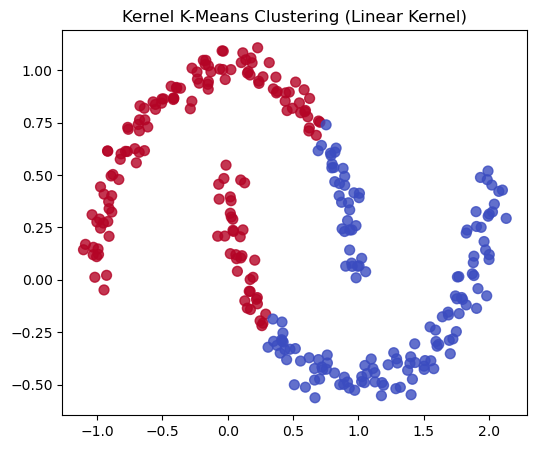

,Feature_1,Feature_2,Label
0,0.622519,-0.372101,1
1,1.904269,-0.136303,1
2,-0.069431,0.456117,1
3,0.933899,0.237483,0
4,1.180360,-0.490847,1


In [2]:
import pandas as pd
from sklearn.datasets import make_moons

# Generate Two-Moons dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Create DataFrame
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])  # Assign column names
df['Label'] = y  # Add labels to the dataset

# ---- Plot Clustering Results ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Kernel K-Means Clustering (Linear Kernel)")
plt.show()
df.head(5)

c:\Users\jarif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


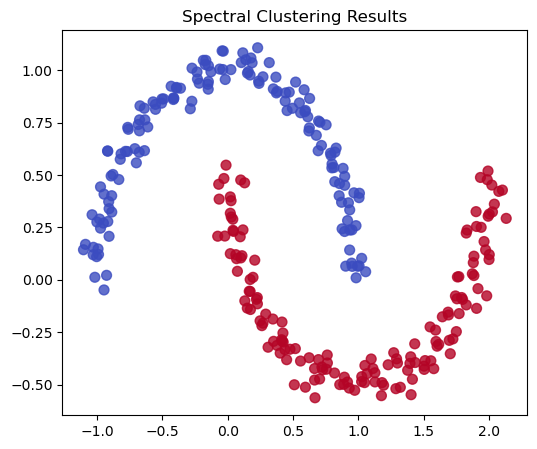

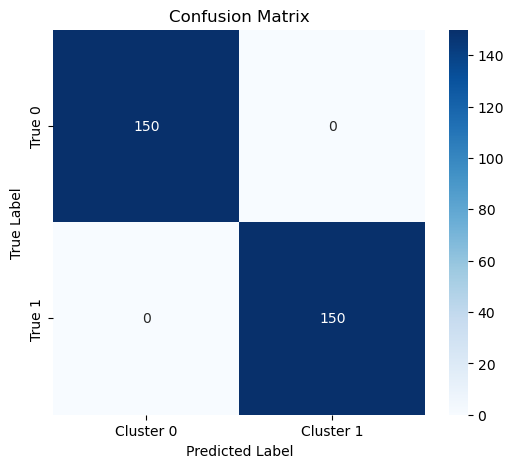

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist

# ---- Generate Synthetic Data ----
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# ---- Step 1: Construct Similarity Graph (Affinity Matrix) ----
def rbf_kernel(X, sigma=0.1):
    pairwise_sq_dists = cdist(X, X, 'sqeuclidean')
    return np.exp(-pairwise_sq_dists / (2 * sigma**2))

A = rbf_kernel(X, sigma=0.1)  # Similarity matrix

# ---- Step 2: Compute the Graph Laplacian ----
D = np.diag(A.sum(axis=1))  # Degree matrix
L = D - A  # Unnormalized Laplacian

# Normalized Laplacian: L_sym = D^(-1/2) * L * D^(-1/2)
D_inv_sqrt = np.diag(np.where(D.diagonal() > 0, 1.0 / np.sqrt(D.diagonal()), 0))
L_norm = D_inv_sqrt @ L @ D_inv_sqrt

# ---- Step 3: Compute Eigenvectors ----
eigvals, eigvecs = np.linalg.eigh(L_norm)
Z = eigvecs[:, :2]  # Take the first 2 eigenvectors

# ---- Step 4: Apply K-Means on Z ----
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(Z)

# ---- Compute Confusion Matrix ----
conf_matrix = confusion_matrix(y_true, y_pred)

# ---- Plot Spectral Clustering Result ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Spectral Clustering Results")
plt.show()

# ---- Plot Confusion Matrix ----
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
